# LAB 7B - CLUSTERING

This lab is comprise of 2 main sections:

 - 1.
 
 - 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airline = pd.read_csv("airline.csv")
airline.info()
airline.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   BonusMiles       3999 non-null   int64
 2   BonusTrans       3999 non-null   int64
 3   FlightMiles      3999 non-null   int64
 4   FlightTrans      3999 non-null   int64
 5   DaysSinceEnroll  3999 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,48296,31329,9,500,1,3061
1,10021,0,0,0,0,7879
2,49280,22370,16,0,0,3312
3,213539,2750,15,0,0,4751
4,125465,14750,9,0,0,7206


In [3]:
airline.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,263685.000000,86.00000,30817.000000,53.000000,8296.00000


We need to preprocess the data so that we treat each column equally to compute the clusters.

We use the `preprocessing` function from `sklearn` that does all the work for us

### Pre-processing

First, center the data (substract the mean to each column)
=> mean becomes 0 for each column

Then, scale the data, by dividing by the standard deviation
=> std becomes 1 for each column

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
airline_scaled = scaler.fit_transform(airline)

airline_scaled = pd.DataFrame(airline_scaled, columns=airline.columns)
airline_scaled.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.487521e-17,-4.175482e-17,-7.640244e-17,-2.665202e-18,1.510281e-17,6.174384e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00


In [5]:
# What does a negative value represent?



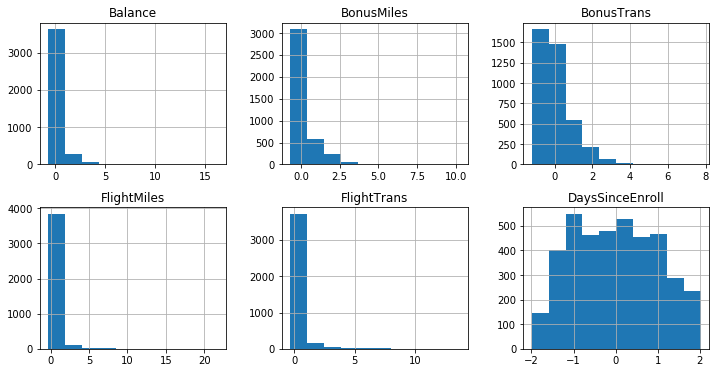

In [6]:
airline_scaled.hist(figsize=(12,6), layout=(2,3))
plt.show()

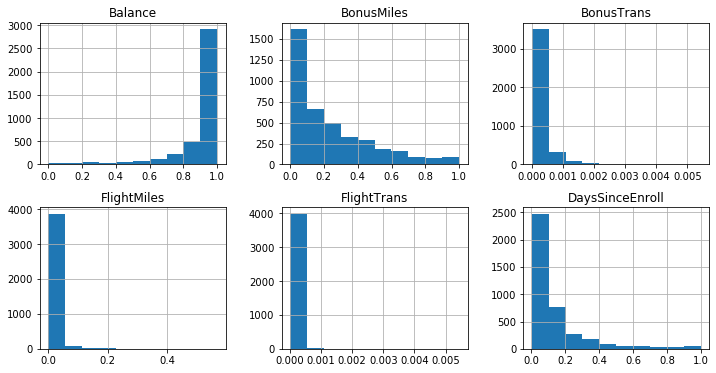

In [7]:
airline_normalized = preprocessing.normalize(airline)
airline_normalized = pd.DataFrame(airline_normalized, columns=airline.columns)

airline_normalized.hist(figsize=(12,6), layout=(2,3))
plt.show()

## K-Means Clustering 

We can select 'k' using the `n_clusters` parameter in `sklearn`s package `KMeans`.

We can set an upper bound to the number of iterations of the algorithm with `max_iter`.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100, random_state=88)
kmeans.fit(airline_scaled)

KMeans(max_iter=100, random_state=88)

Let's explore the results!

How good is the clustering? 

In [9]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

8147.433362829322

In [10]:
# Number of iterations
kmeans.n_iter_

34

In [11]:
# Cluster for each datapoint
kmeans.labels_

array([7, 3, 7, ..., 0, 1, 4], dtype=int32)

In [12]:
# Cluster centroids
kmeans.cluster_centers_

array([[ 0.32096733,  0.21675139,  0.46144572, -0.17469075, -0.19297983,
         1.01838517],
       [-0.41452407, -0.60824775, -0.86068015, -0.23595667, -0.24383239,
        -1.01902782],
       [ 5.98854399,  2.09080064,  1.11453531,  0.80023571,  1.10518261,
         1.16961704],
       [-0.35735787, -0.57943943, -0.74226545, -0.21801418, -0.22915325,
         0.69937197],
       [ 0.75217077,  2.26445635,  1.13123866, -0.07868718, -0.05117893,
         0.50451502],
       [ 0.76871189,  0.86170063,  2.49449435,  5.83805875,  6.07319995,
         0.15280077],
       [ 0.41031906,  0.15936003,  0.83271876,  1.88467944,  1.92894454,
         0.02161725],
       [-0.16151761,  0.09066922,  0.55262589, -0.23883958, -0.25695257,
        -0.64358585]])

If we would like to know the number of observations that belong to each cluster, we can easily calculate that:

In [13]:
kmeans_size = []
clusters = np.unique(kmeans.labels_)
for cluster in clusters:
    kmeans_size.append(len(np.where(kmeans.labels_ == cluster)[0]))

kmeans_size                       

[668, 964, 46, 891, 313, 54, 219, 844]

### Scree Plot (selecting the value of K)

To creat the plot we need to compute the cluster dissimilarity for different values of k

In [14]:
wcss = []
for k in range(1, 100):
    kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(airline_scaled)
    wcss.append(kmeans.inertia_)

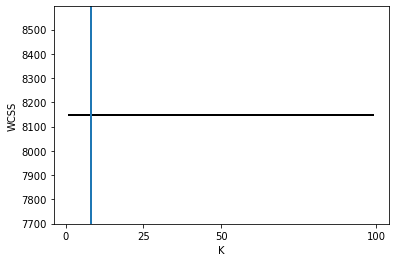

In [15]:
plt.plot(range(1, 100), wcss, linewidth=2, color='black')
plt.axvline(x=8, linewidth=2)
plt.xticks([0,25,50,100])
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

***Was k = 8 a good choice ?***

Remember that we are looking for a "knee" in the curve / a place where rocks stop falling

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## Hierarchical Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',
                                        distance_threshold=0)
agglomerative.fit(airline_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

https://en.wikipedia.org/wiki/Ward%27s_method

In [17]:
agglomerative.n_clusters_

3999

In [18]:
agglomerative.labels_

array([3065, 3904, 2863, ...,    3,    1,    0])

In [19]:
agglomerative.distances_

array([0.00000000e+00, 1.88561158e-03, 2.26431613e-03, ...,
       6.34860857e+01, 8.25114951e+01, 1.00751847e+02])

### Plot Dendrogram

In [20]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)    

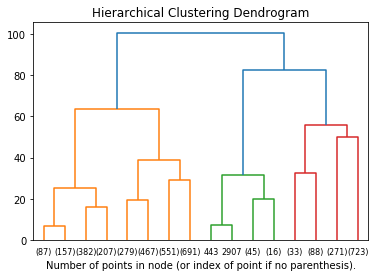

In [21]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=3, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Reference for plot code:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py]

In [22]:
height = []
for k in range(1, 100):
    agglomerative = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglomerative.fit(airline_scaled)
    height.append(agglomerative.inertia_)

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

In [ ]:
plt.plot(range(1, 100), sse, linewidth=2, color='black')
# plt.axvline(x=8, linewidth=2)
plt.xticks([0,25,50,100])
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# To choose a good value for K, we need to create the same
# scree plot: dissimilarity for each k
# the next line puts this data in the right form to be plotted
dat.hc.airline <- data.frame(k = seq_along(mod.hclust$height),
                             dissimilarity = rev(mod.hclust$height))
#  height is a returned vector, denotes the value of the criterion for the particular agglomeration.

# Scree plot! 
ggplot(dat.hc.airline, aes(x=k, y=dissimilarity)) +
  geom_line()+
  xlab("Number of Clusters") +
  ylab("Dissimilarity")

# Let's zoom on the smallest k values:
ggplot(dat.hc.airline, aes(x=k, y=dissimilarity)) +
  geom_line()+
  xlab("Number of Clusters") +
  ylab("Dissimilarity") + 
  xlim(0,100)

# what would be a "good" k value ?

# now that we have k, we can construct the clusters
assignments <- cutree(mod.hclust, k = 5)
rev(mod.hclust$height)[5]
rev(mod.hclust$height)[4]
# we can also cut based on height
# sometiems just visually inspecting the dendrogram is enough
# but always good to validate with the scree plot
assignments2 <- cutree(mod.hclust, h = 55)

# test for the same clusters
all.equal(assignments, assignments2)

# store it into our data frame
airline.scaled$clust2 = assignments

# and finally use dplyr to have access to the centroids
# group_by groups observations in our data frame together based on which
# cluster each observation is assigned to
# very powerful and simple way to calculate important summaries of our data
# more on this and related topics in 2 weeks
airline.scaled %>% group_by(clust2) %>%
  summarize(mean(Balance), mean(BonusMiles), mean(BonusTrans))
# a shortcut to have the mean of all columns
airline.scaled %>% group_by(clust2) %>%
  summarize_all(funs(mean))

# we can also compute the size of each cluster
table(assignments)
